# [Campus Recruitment - 35]

**Group Members:**

Barış Bakırdöven 29028

Ayşe Sena Acar 29506

Ece Güler 29107

Ada Yılmaz 29364

Büşra Güler 29558


## Introduction





The purpose of the study is to understand relationships between attributes of students and reveal which features lead to better placement rates in XYZ campus .

**The steps included:**




1. Clearing the data set:

 Converting data to different representations such as numerical value so that such data are easier to study and manipulate.Inserting new columns to the data frame to make better analysis of relationships. An example: addition of Average Grade columnd which is the average a student's secondary school, high school, university, master grades & percentages.



2. Visualization and Hypothesization:

  Visualizing the data by utilizing the heatmap, bar charts and box plots to show relations of features and creating hypothesis' regarding relationships and reaching logical conclusions.

3. Machine Learning implementation:

  Implementing Random Forest and KNN machine learning models to determine the likeliness of a student in XYZ campus to get placed, given his/her other attributes.


### Problem Definition

There are 4 main questions this project aims to anwer:


1.   Which factor influenced a candidate in getting placed?
2.   Does percentage matters for one to get placed?
3.   Which degree specialization is much demanded by corporate?
4.   How do different features in the database correlate with each other?





To give asnwers to these questions, hypothesis' that could explain correlations are built through observation, and logical deductions are made to reach conclusions. Some of the relationships examined are Gender-Placement-work experience, Salary-Degree Average-Employment Test, High school specialization-degree average-salary, High school specialization-placement, and MBA specialization-placement. When the process of finding, visualizing and hypothesizing is over, Random Forest and KNN machine learning models are implemented to predict placement status of students with different attributes and give us the feature importance order. 



### Utilized Datasets


1) Data set used in this project is the following, [Campus Recruitment](https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement); 5 kB from Kaggle. This set containt the Placement data of students in a XYZ campus which includes data such as secondary and higher secondary school percentage and specialization of students. 



---


2) Total number of observations: 9
  



1.   Salary-Degree Average-Employment Test

2.   Work Experience-Gender-Status

3.   High school specialization-degree average-salary

1.   High school specialization-placement

2.   MBA specialization-placemet

1.   Ratio of High School specialization

2.   Ratio of Job specialization

1.   Salary-Employment Test Score

2.   Degree Average-Salary













---



3) Data types and explanations: Data types and explanations of features in the data set 

A total of 15 features:



**1.   sl_no:** 


>    A number assigned to each student uniquely.



>    Serial Number, data type = integer 


  
**2.   gender:** 

>    Data type: Categories: Male, Female








**3.   ssc_p:** 


>    Secondary Education percentage - 10th Grade


>    Data type: numerical value 




**4.   ssc_b:**



>    Board of Education for Secondary Education - Central/ Others


>    Data type: Categories, After conversion: "Others" = 0, "Central" = 1






**5.   hsc_p:**



>   Higher Secondary Education percentage - 12th Grade


>   Data type: Numerical value





**6.   hsc_b:**

>   Board of Education for Higher Secondary Education - Central/ Others


>   Data type: Categories, After conversion: "Others" = 0, "Central" = 1



**7.   hsc_s:**

>   Specialization in Higher Secondary Education


>   Data type: Categories: Commerce, Science, Other



**8.   degree_p:**

>   Degree Percentage


>   Data type: Numerical value



**9.   degree_t:**

>   Under Graduation(Degree type)- Field of degree education


>   Data type: Categories: Comm&Mgmt, Sci&Tech, Other



**10.   workex:**

>   Work Experience


>   Data type: Categories, After Conversion: "No" = 0, "Yes" = 1



**11.   etest_p:**

>   Employability test percentage ( conducted by college)


>   Data type: Numerical value



**12.   specialisation:**

>   Post Graduation(MBA)- Specialization


>   Data type: Categories: Mkt&Fin, Mkt&HR



**13.   mba_p:**

>   MBA percentage


>   Data type: Numerical value



**14.   status:**

>   Status of placement- Placed/Not placed


>   Data type: Categories, After Conversion: "Not Placed" = 0, "Placed" = 1



**15.   salary:**

>   Salary offered by corporate to candidates


>   Data type: Numerical value






---

















4) Additional Data types: Data types of features that have been added to the data set



**1. degree_avg**



>   Degree average of a student's ssc_p (), hsc_p (), degree_p (), mba_p ()




**2. degree_avg_group**



>   High: Degree Average >= 75


>   Upper-mid: 75 > Degree Average >= 65


>   Lower-mid: 65 > Degree Average >= 55


>   Low: 55 > Degree Average











---










4) Plot figures used:



*   Bar plot
*   Heatmap
*   Scatter plot
*   Pie chart
   








---




5) Utilized Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_curve, auc, precision_recall_curve, roc_auc_score

## Data Exploration



#### **1) Clearing the Data:**

**-**Importing Google Drive and the file consisting of our dataset, then creating a Pandas object from the file:

In [ ]:
from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
fname = "Placement_Data_Full_Class.csv"
path_prefix = './drive/My Drive'
df = pd.read_csv(join(path_prefix, fname))
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [ ]:
df.shape

(215, 15)

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
NA = pd.concat([df.isnull().sum()], axis = 1, keys = ["Empty"])
NA[NA.sum(axis=1)>0]

,Empty
salary,67


-Turning status into numerical value:

In [ ]:
for i in range(df.shape[0]):
  if df['status'][i] == "Placed":
    df['status'][i] = 1.00
  elif df['status'][i] == "Not Placed":
    df['status'][i] = 0.00
df.head()

<ipython-input-7-1152f30ad8d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][i] = 1.00
<ipython-input-7-1152f30ad8d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][i] = 0.00


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1.0,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1.0,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1.0,425000.0


-Since most empty lines occur in salary column, and our main goal is to decide on placement chances of a student, we create a dataframe without salary(df_ws) we will use in implementation of machine learning models, as the existing of empty rows hurt the accuracy of our models.

-Note that df (our original dataframe) will continue to exist and any changes made on df_ws (except dummy convertion) from now on will be also done on df, which will be used for visualization.

In [ ]:
df_ws = df.drop(["salary"],axis = 1)
df_ws.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1.0


---
**-**Making non-numeric values into numeric values (only for df_ws):

In [ ]:
for col in df_ws.dtypes[df_ws.dtypes == "object"].index:
  if(col != "status"):
    fd = df_ws.pop(col)
    df_ws = pd.concat([df_ws, pd.get_dummies(fd, prefix = col)], axis = 1)

df_ws.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_F,gender_M,ssc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,1.0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,2,79.33,78.33,77.48,86.5,66.28,1.0,0,1,1,...,0,0,1,0,0,1,0,1,1,0
2,3,65.00,68.00,64.00,75.0,57.80,1.0,0,1,1,...,1,0,0,1,0,0,1,0,1,0
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
4,5,85.80,73.60,73.30,96.8,55.50,1.0,0,1,1,...,0,1,0,1,0,0,1,0,1,0


---
**-**Adding a new column containing the degree average of 10th grade, 12th grade, college, and MBA degrees which are in the dataset:


In [ ]:
avg_list = []
avg = 0

for i in range(df.shape[0]):
  avg = (df['ssc_p'][i] + df['hsc_p'][i] + df['degree_p'][i] + df['mba_p'][i])/4
  avg_list.append(avg)

df['degree_avg'] = avg_list
df_ws['degree_avg'] = avg_list
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,degree_avg
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1.0,270000.0,68.7000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1.0,200000.0,75.3550
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1.0,250000.0,63.7000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0.0,NaN,54.8575
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1.0,425000.0,72.0500


---
**-**Creating a new column consisting of the data average group, with the groups
low ( - 55),
lower-mid (55 - 65),
upper-mid (65 - 75), and
high (75- )

In [ ]:
col_list = []

for i in range(df.shape[0]):
  if (df_ws['degree_avg'][i] < 55):
    col_list.append("low")

  elif (df_ws['degree_avg'][i] < 65):
    col_list.append("lower-mid")

  elif (df_ws['degree_avg'][i] < 75):
    col_list.append("upper-mid")

  else:
        col_list.append("high")

df_ws['degree_avg_group']= col_list
df['degree_avg_group']= col_list

fd = df_ws.pop("degree_avg_group")
df_ws = pd.concat([df_ws, pd.get_dummies(fd, prefix = col)], axis = 1)

df_ws.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_F,gender_M,ssc_b_Central,...,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,degree_avg,status_high,status_low,status_lower-mid,status_upper-mid
0,1,67.00,91.00,58.00,55.0,58.80,1.0,0,1,0,...,1,1,0,0,1,68.7000,0,0,0,1
1,2,79.33,78.33,77.48,86.5,66.28,1.0,0,1,1,...,1,0,1,1,0,75.3550,1,0,0,0
2,3,65.00,68.00,64.00,75.0,57.80,1.0,0,1,1,...,0,1,0,1,0,63.7000,0,0,1,0
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,...,1,1,0,0,1,54.8575,0,1,0,0
4,5,85.80,73.60,73.30,96.8,55.50,1.0,0,1,1,...,0,1,0,1,0,72.0500,0,0,0,1


---
**-**Creating a new Pandas Dataframe object without the rows which are Not Placed:

In [ ]:
placed = df.dropna()
placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,degree_avg,degree_avg_group
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1.0,270000.0,68.700,upper-mid
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1.0,200000.0,75.355,high
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1.0,250000.0,63.700,lower-mid
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1.0,425000.0,72.050,upper-mid
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,1.0,252000.0,68.535,upper-mid


---
*-*Creating a new Pandas Dataframe object only with those who have a salary offer of less than 320 000 dollars:
(most of the rows are this way, we wanted to exclude outliers from the data so that we can show better correlation, if there is any)

In [ ]:
newdf = df[df['salary'] < 320000]
newdf.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,degree_avg,degree_avg_group
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,1.0,270000.0,68.7000,upper-mid
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,1.0,200000.0,75.3550,high
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,1.0,250000.0,63.7000,lower-mid
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,1.0,252000.0,68.5350,upper-mid
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,1.0,231000.0,71.3225,upper-mid


#### **2) Visualization and Hypothesization:**

---
**-**Using the placed Dataframe to create a correlation heatmap of the attributes employment test score, degree average, and salary:


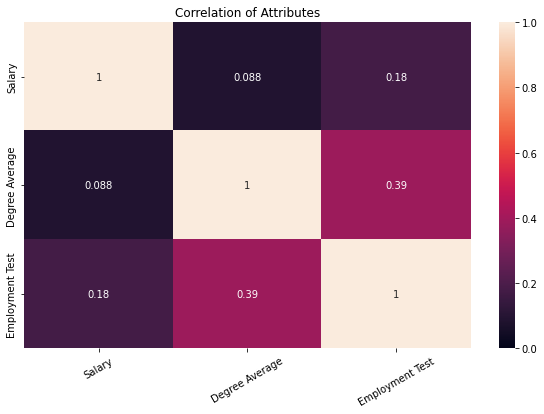

In [ ]:
corr = placed[['salary', 'degree_avg', 'etest_p']].corr()

plt.figure(figsize = (10,6))
plt.title('Correlation of Attributes')

sns.heatmap(data = corr, vmin = 0.0, vmax = 1.0, annot = True,
            xticklabels = ['Salary', 'Degree Average', 'Employment Test'],
            yticklabels = ['Salary', 'Degree Average', 'Employment Test'])

plt.xticks(rotation = 30)


plt.savefig('heatmap.png', dpi=300)

*It is clearly seen that the correlation of salary and employment test score is more than twice the correlation of salary and degree average. The takeaway here could be that employment test score is more important than degree average for determining their salary. (Keep in mind that this dataset only had placed rows, there was no empty values)*

---
**-**Creating a grouped bar chart showing the relationship between the attributes gender, placement status and work experience:


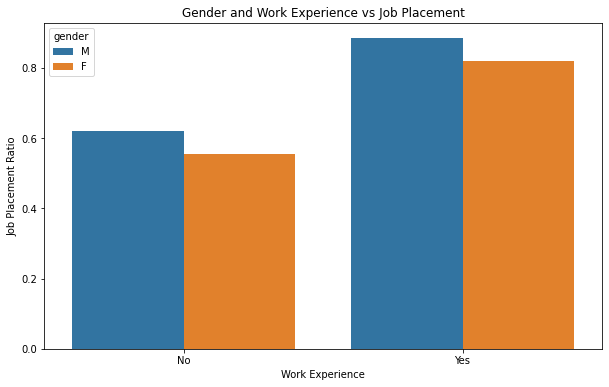

In [ ]:
plt.figure(figsize = (10,6))
plt.title('Gender and Work Experience vs Job Placement')

g = sns.barplot(data=df[['status', 'workex', 'gender']], x="workex",
                y="status", hue="gender", ci = 0)
g.set(xlabel='Work Experience', ylabel= 'Job Placement Ratio')
x=np.arange(2)
plt.xticks(x,["No", "Yes"])
plt.show()

*This graph shows that people with work experience are far more likely to be placed in an occupational position than people with no work experience.* 

*It can also be clearly seen that Job Placement Ratio is higher for men than women, regardless of work experience.*

---
**-**Using the degree average column to show its relationship with salary:

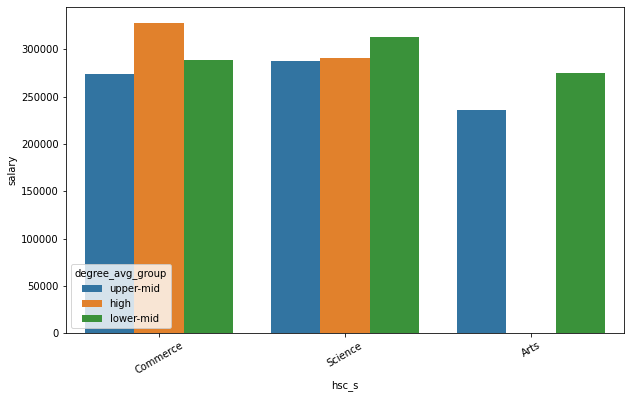

In [ ]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=30)
plt.title('')

g = sns.barplot(data=placed[['salary', 'hsc_s', 'degree_avg_group']], x="hsc_s",
                y="salary", hue="degree_avg_group", ci = 0)

*Main takeaway from the above graph is that people who specialized in commerce and have high degree averages have significantly higher salaries compared to people with lower degree averages in same field, yet this is not the case for people who are specialized in science. Here, we see that degree averages is not as important and that lower-mid salaries are higher than high average salaries.*

*An interesting point to notice is that people with lower-mid averages in high school seem to have higher salaries than people with upper-mid averages in all specialization fields.*

*People with high averages in high school do not seem to choose Arts as their area of specialization.*

*A very important takeaway would be that since this chart uses people who are placed as samples, the fact that people with low degree averages cannot be seen here at all indicates that there are no people with a low average grade that managed to get placed. While it is bold to assume that below a certain degree average, it is impossible get placed, it certainly is logical to claim that below a certain degree average it is highly unlikely to get placed, making this factor an important one for placement. This calls for further investigation.*

---
**-**Creating pie charts of specialisation ratios:

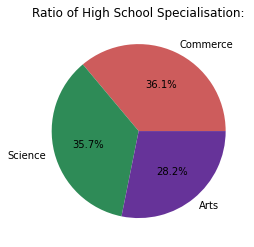

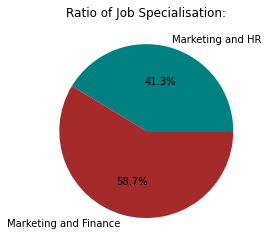

In [ ]:
commerce_ratio = placed['hsc_s'].value_counts()["Commerce"] / df['hsc_s'].value_counts()["Commerce"]
science_ratio = placed['hsc_s'].value_counts()["Science"] / df['hsc_s'].value_counts()["Science"]
arts_ratio = placed['hsc_s'].value_counts()["Arts"] / df['hsc_s'].value_counts()["Arts"]

hr_ratio = placed['specialisation'].value_counts()["Mkt&HR"] / df['specialisation'].value_counts()["Mkt&HR"]
fin_ratio = placed['specialisation'].value_counts()["Mkt&Fin"] / df['specialisation'].value_counts()["Mkt&Fin"]


x = np.array([commerce_ratio, science_ratio, arts_ratio])
mylabels = ["Commerce", "Science", "Arts"]
mycolors = ["#CD5C5C", "#2E8B57", "#663399"]

ax1 = plt.pie(x, labels = mylabels, colors = mycolors, autopct='%1.1f%%')
plt.title("Ratio of High School Specialisation:")
plt.show() 

print("\n")

y = np.array([hr_ratio, fin_ratio])
mylabels2 = ["Marketing and HR", "Marketing and Finance"]
mycolors2 = ["#008080", "#a52a2a"]

ax2 = plt.pie(y, labels = mylabels2, colors = mycolors2, autopct='%1.1f%%')
plt.title("Ratio of Job Specialisation:")
plt.show() 

---
*-*Scatter plot with regression line to show correlation between salary and employment test score:


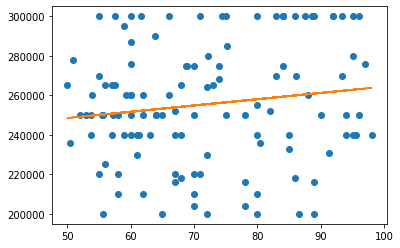

In [ ]:
x = newdf['etest_p']
y = newdf['salary']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.show()

---
*-*Scatterplot with regression line to show correlation between degree average and salary:


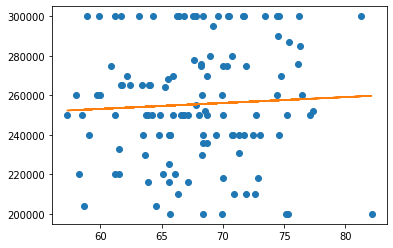

In [ ]:
x = newdf['degree_avg']
y = newdf['salary']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.show()

The scatterplots above demonstrate that there is none to minimal correlation between degree average and salary or employment test score and salary. It can be concluded that employment test score and degree average cannot be used to determine someone's salary.

## Machine Learning Models



### Implementation


-Splitting our data to target and rest:








In [ ]:
X = df_ws.drop(columns = ['status'])
X.pop('sl_no')
y = df_ws['status'].astype('int')



---


-Stratified splitting data to train, validation and test datasets:

In [ ]:
#80% train, 10% validation, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)




---


-Standardizing our model:

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 1) Random Forest



-Implementing our Random Forest model:

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()



---


-Testing accuracy of our model:

In [ ]:
predictions = rf_model.predict(X_test)
rf_predictions_val = rf_model.predict(X_val)
rf_acc_val = accuracy_score(y_val, rf_predictions_val)
rf_acc_test = accuracy_score(y_test, predictions)

print("Random Forest Test Accuracy: "+str(rf_acc_test))
print("Random Forest Validation Accuracy: "+str(rf_acc_val))
print("Random Forest Train Accuracy: "+str(accuracy_score(y_train, rf_model.predict(X_train))))

Random Forest Test Accuracy: 0.8095238095238095
Random Forest Validation Accuracy: 0.7272727272727273
Random Forest Train Accuracy: 1.0




---


-Testing different max depth parameter values to increase test accuracy:

In [ ]:
max_depths = [2, 3, 5, 7, 9, 11]

for max_depth in max_depths:
  rf_model = RandomForestClassifier(n_estimators=100,max_depth=max_depth)
  rf_model.fit(X_train, y_train)
  
  preds = rf_model.predict(X_test)
  print("max_depth = ", max_depth, ", Accuracy: ", accuracy_score(y_test, preds))

max_depth =  2 , Accuracy:  0.7619047619047619
max_depth =  3 , Accuracy:  0.7619047619047619
max_depth =  5 , Accuracy:  0.7619047619047619
max_depth =  7 , Accuracy:  0.7619047619047619
max_depth =  9 , Accuracy:  0.8095238095238095
max_depth =  11 , Accuracy:  0.7619047619047619




---


-Testing different n_estimators to increase test accuracy:

In [ ]:
n_estimators = [50,100,300,500]

for n_estimator in n_estimators:
  rf_model = RandomForestClassifier(n_estimators=n_estimator,max_depth=9)
  rf_model.fit(X_train, y_train)
  
  preds = rf_model.predict(X_test)
  print("n_estimator = ", n_estimator, ", Accuracy: ", accuracy_score(y_test, preds))

n_estimator =  50 , Accuracy:  0.8571428571428571
n_estimator =  100 , Accuracy:  0.8095238095238095
n_estimator =  300 , Accuracy:  0.7619047619047619
n_estimator =  500 , Accuracy:  0.7619047619047619




---


-Implementing our Random Forest model again with improved performance (max_depth = 9, n_estimators = 50):

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth = 9)
rf_model.fit(X_train, y_train)

preds = rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))

Accuracy:  0.9047619047619048




---


-Saving our model as joblib file:

In [ ]:
joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']



---


-Visualization of a randomly selected Decision Tree from our Random Forest model:

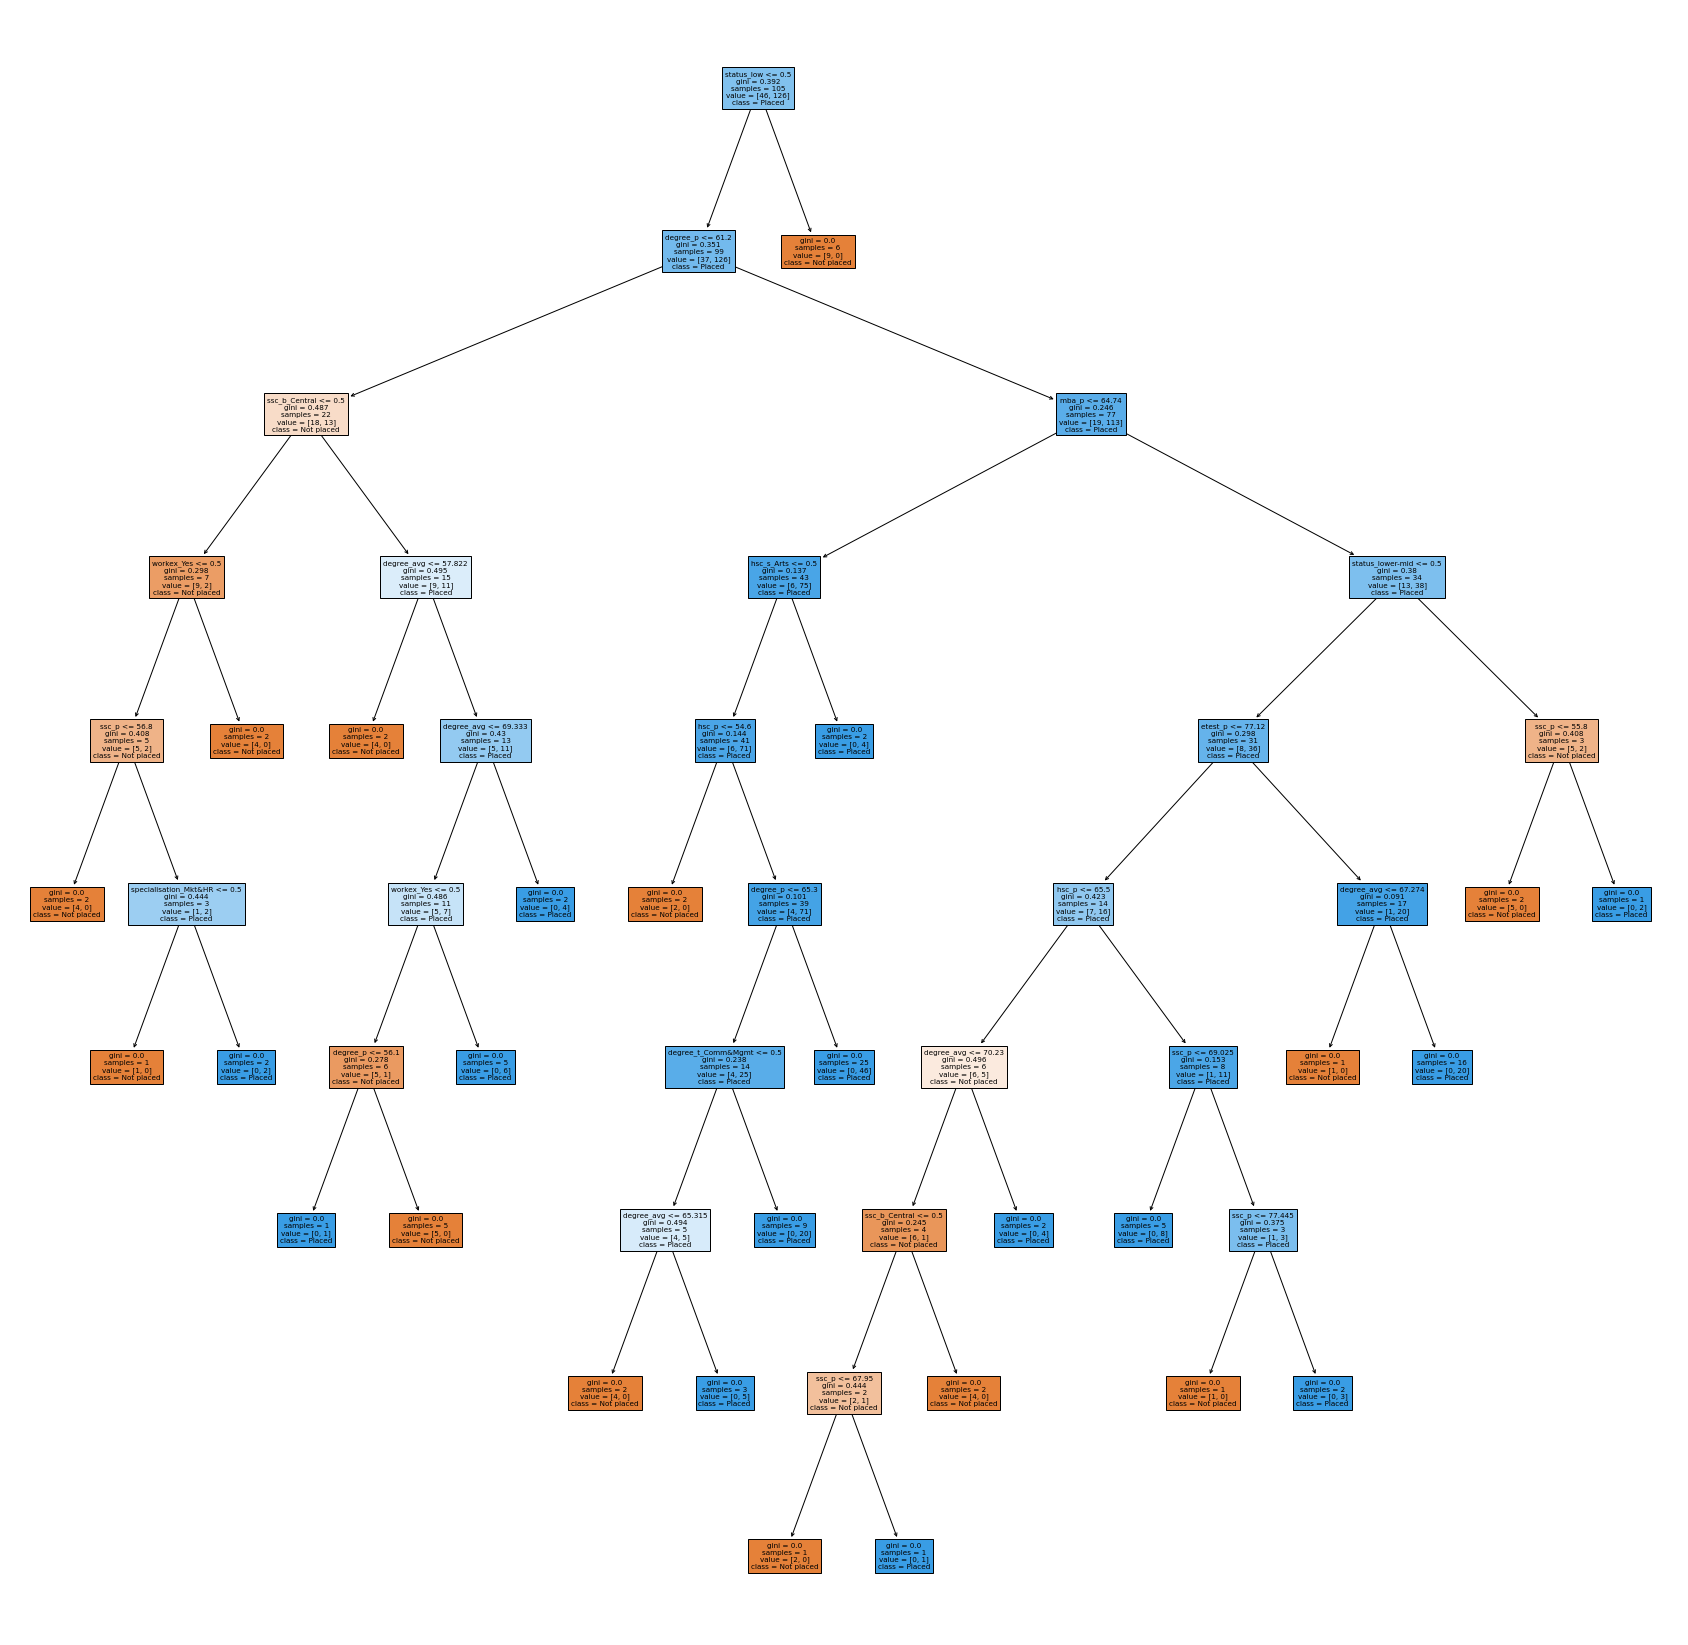

In [ ]:
fig = plt.figure(figsize=(30, 30)) 
tree = rf_model.estimators_[2] #select a random tree
plot_tree(tree, feature_names=X.columns.values, class_names=["Not placed", "Placed"], filled=True); #use plot_tree method

#### 2) KNN

-Implementing our KNN model:

In [ ]:
k=3
knn_model = KNeighborsClassifier(k, metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)



---


-Testing accuracy of our model:

In [ ]:
knn_predictions = knn_model.predict(X_test)
knn_predictions_val = knn_model.predict(X_val)
knn_acc_val = accuracy_score(y_val, knn_predictions_val)
knn_acc_test = accuracy_score(y_test, knn_predictions)

print("KNN Test Accuracy: "+str(knn_acc_test)) #could also just use .score()
print("KNN Validation Accuracy: "+str(knn_acc_val))
print("KNN Train Accuracy: "+str(accuracy_score(y_train, knn_model.predict(X_train))))

KNN Test Accuracy: 0.7619047619047619
KNN Validation Accuracy: 0.7727272727272727
KNN Train Accuracy: 0.8662790697674418




---


-For hyperparameter tuning, try different n_neighbors from 1 to 21:

In [ ]:
for n_neighbor in range(1,22):
  knn_model = KNeighborsClassifier(n_neighbors = n_neighbor)
  knn_model.fit(X_train, y_train)
  
  knn_preds = knn_model.predict(X_test)
  print("k = ", n_neighbor, ", Accuracy: ", accuracy_score(y_test, knn_preds))

k =  1 , Accuracy:  0.7619047619047619
k =  2 , Accuracy:  0.7619047619047619
k =  3 , Accuracy:  0.7619047619047619
k =  4 , Accuracy:  0.7142857142857143
k =  5 , Accuracy:  0.7619047619047619
k =  6 , Accuracy:  0.7619047619047619
k =  7 , Accuracy:  0.7619047619047619
k =  8 , Accuracy:  0.7619047619047619
k =  9 , Accuracy:  0.7619047619047619
k =  10 , Accuracy:  0.7619047619047619
k =  11 , Accuracy:  0.7619047619047619
k =  12 , Accuracy:  0.7619047619047619
k =  13 , Accuracy:  0.7619047619047619
k =  14 , Accuracy:  0.7619047619047619
k =  15 , Accuracy:  0.7619047619047619
k =  16 , Accuracy:  0.7619047619047619
k =  17 , Accuracy:  0.7619047619047619
k =  18 , Accuracy:  0.7619047619047619
k =  19 , Accuracy:  0.7619047619047619
k =  20 , Accuracy:  0.7619047619047619
k =  21 , Accuracy:  0.7619047619047619


There is no improvement in performance in any of these cases. We will continue with k=3 for our model



---


-Use of different metrics may also have impact on accuracy:

In [ ]:
for met in ['euclidean', 'manhattan', 'minkowski']:
  knn_model = KNeighborsClassifier(n_neighbors = 3, metric=met)
  knn_model.fit(X_train, y_train)
  
  preds = knn_model.predict(X_test)
  print("k = 1 , metric: ", met , "Accuracy: ", accuracy_score(y_test, preds))

k = 1 , metric:  euclidean Accuracy:  0.7619047619047619
k = 1 , metric:  manhattan Accuracy:  0.7142857142857143
k = 1 , metric:  minkowski Accuracy:  0.7619047619047619


*There is no improvement in performance in any of these cases. We will continue with euclidean metric for our model*



---


-Saving our model as joblib file:

In [ ]:
joblib.dump(knn_model, 'lr_model.joblib')

['lr_model.joblib']

### Results & Discussion



#### 1) Comparison Between Models

Random Forest model is more advantegous, as it is more accurate and easier to use/visualize.
This statement can be better understood from following sections:

##### 1) With ROC and AUC

-Calculate auc scores based on test data of each model:

In [ ]:
pred_prob_rf = rf_model.predict_proba(X_test)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

pred_prob_knn = knn_model.predict_proba(X_test)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score_rf = roc_auc_score(y_test, pred_prob_rf[:,1])
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])

print("AUC score of Random Forest:", auc_score_rf)
print("AUC score of KNN:", auc_score_knn)

AUC score of Random Forest: 0.8875000000000001
AUC score of KNN: 0.70625




---


-Draw ROC based on test data of each model:

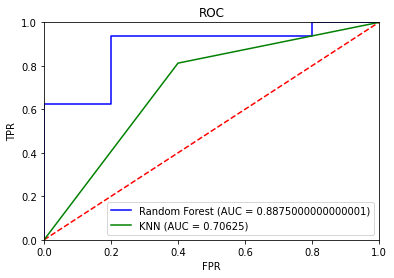

In [ ]:
plt.plot(fpr_rf, tpr_rf, color='blue', label=str("Random Forest (AUC = " + str(auc_score_rf) + ")"))
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
plt.plot(fpr_knn, tpr_knn, color='green', label=str("KNN (AUC = " + str(auc_score_knn) + ")"))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='best')
plt.show()

***CONCLUSION***

*It can be easily seen that the area under ROC (which is AUC)  of Random Forest model is larger than that of KNN model, which implies that Random Forest model is better suited for processing our data in this project.*

##### 2) With Confusion Matrices

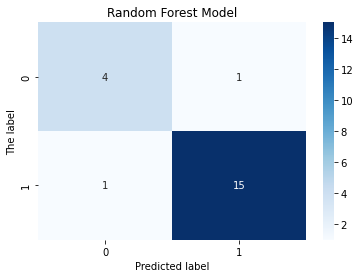

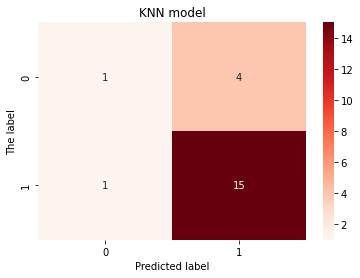

In [ ]:
preds = rf_model.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = [0,1])
sns.heatmap(cm, cmap = "Blues", annot = True)
plt.title('Random Forest Model')
plt.xlabel("Predicted label")
plt.ylabel("The label")
plt.show()

preds = knn_model.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = [0,1])
sns.heatmap(cm, cmap = "Reds", annot = True)
plt.title('KNN model')
plt.xlabel("Predicted label")
plt.ylabel("The label")
plt.show()

**CONCLUSION**

*For Random Forest, 15 students were correcly predicted as placed, and 4 were correctly predicted as not placed, while 1 student that wasn't placed was predicted as placed, and 1 student that was placed was predicted as not placed. 19/21 success rate gives us 90%, which was the value we calculated as our model's accuracy in the first place.*

*For KNN, 15 students were correcly predicted as placed, and 1 were correctly predicted as not placed, while 1 student that wasn't placed was predicted as placed, and 4 student that was placed was predicted as not placed. 16/21 success rate gives us 76%, which was the value we calculated as our model's accuracy in the first place.*

*In conclusion, KNN model is more confused than Random Forest model, as can be seen from confusin matrices, making it disadvantegous.*

#### 2) Importance of Features



-Deducting importances of features/variables:

In [ ]:
fl = list(range(df_ws.shape[1]))

importances = list(rf_model.feature_importances_)

feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(fl, importances)]

feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

for pair in feature_importances[:]:
  print("Variable: {:2}   Importance: {}".format(*pair))


Variable:  0   Importance: 0.2
Variable: 21   Importance: 0.17
Variable:  1   Importance: 0.16
Variable:  2   Importance: 0.12
Variable:  4   Importance: 0.11
Variable:  3   Importance: 0.04
Variable: 25   Importance: 0.03
Variable: 18   Importance: 0.02
Variable: 23   Importance: 0.02
Variable: 24   Importance: 0.02
Variable:  5   Importance: 0.01
Variable:  6   Importance: 0.01
Variable:  7   Importance: 0.01
Variable:  9   Importance: 0.01
Variable: 12   Importance: 0.01
Variable: 13   Importance: 0.01
Variable: 14   Importance: 0.01
Variable: 16   Importance: 0.01
Variable: 17   Importance: 0.01
Variable: 20   Importance: 0.01
Variable:  8   Importance: 0.0
Variable: 10   Importance: 0.0
Variable: 11   Importance: 0.0
Variable: 15   Importance: 0.0
Variable: 19   Importance: 0.0
Variable: 22   Importance: 0.0




---


-Writing variables and their corresponding importances:

In [ ]:
for i in range(len(X.columns) - 1):
  print("Feature:", X.iloc[:,feature_importances[i][0]].name, "------- Importance:", feature_importances[i][1])

Feature: ssc_p ------- Importance: 0.2
Feature: degree_avg ------- Importance: 0.17
Feature: hsc_p ------- Importance: 0.16
Feature: degree_p ------- Importance: 0.12
Feature: mba_p ------- Importance: 0.11
Feature: etest_p ------- Importance: 0.04
Feature: status_upper-mid ------- Importance: 0.03
Feature: workex_Yes ------- Importance: 0.02
Feature: status_low ------- Importance: 0.02
Feature: status_lower-mid ------- Importance: 0.02
Feature: gender_F ------- Importance: 0.01
Feature: gender_M ------- Importance: 0.01
Feature: ssc_b_Central ------- Importance: 0.01
Feature: hsc_b_Central ------- Importance: 0.01
Feature: hsc_s_Commerce ------- Importance: 0.01
Feature: hsc_s_Science ------- Importance: 0.01
Feature: degree_t_Comm&Mgmt ------- Importance: 0.01
Feature: degree_t_Sci&Tech ------- Importance: 0.01
Feature: workex_No ------- Importance: 0.01
Feature: specialisation_Mkt&HR ------- Importance: 0.01
Feature: ssc_b_Others ------- Importance: 0.0
Feature: hsc_b_Others -------



---


-A better visualization of importances of variables:

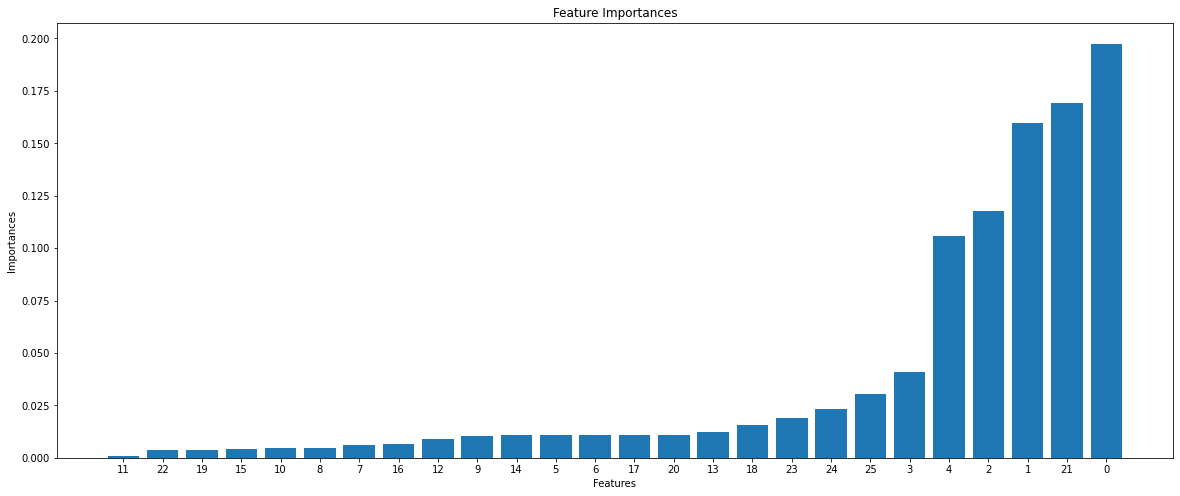

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

index=np.argsort(importances)
arr_sorted=[]

for i in index:
  arr_sorted.append(importances[i])
x=np.arange(0,len(importances))

ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted)

plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")
plt.show()



---


***CONCLUSION***

*Through analysis and visualization, we see that,*



> *The most important feature: Secondary school percantage*



> *Useless feature(s): Specialization in Marketing and Finance, Board  of* *education type for schools at any level, Undergrad degree in any other type* *than Comm&Mgmt and Sci&Tech, High School specialization in Arts*


*Remarks:*


> *1) The 5 most important features for placement of students are all related to* *their grades(degree percentages). The education level at which grades have the most impact is Secondary School.*



> *2) Total grade average of a student spanning from first level of education to last plays a significant role in his/her placement, as it is second in the feature importance order.*


> *3) Features other than the ones related with grades have little impact on placement, and should be compared within themselves.


> *4) The area of specialization with most impact on placement is Comm&Mgmt,* *meaning it is the most demander area of specialization by firms. Note that the* *difference is not that significant, but it is there.*



> *5) Gender, as a feature plays little role in placement.*



> *6) Employibility test and work experience are the most important features for placement after education grades*














As an experiment, plot placement-most important feature found from random forest using scatter plot:

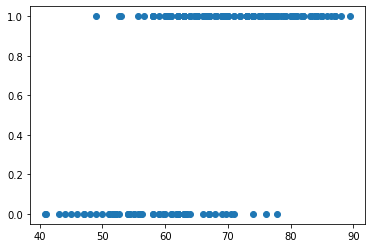

In [ ]:
x = df_ws['ssc_p']
y = df_ws['status']
plt.scatter(x, y)
plt.show()

*See how a person with higher secondary school degree is more likely to get placed and a person with low secondary school degree is more likely to be not placed.*

## Conclusion

Questions asked at the beginning were:



> 1) Which factor influenced a candidate in getting placed?


> 2) Does percentage matters for one to get placed?

> 3) Which degree specialization is much demanded by corporate?

> 4) How do different features in the database correlate with each other?

Our project successfully answers all the questions:




> 1) We were able to seperate useless features from impactful ones through our ML model's ability to give us a feature importance ordered list.

> 2) We were able to not only see that it matters but also that it matters **the most**.

> 3) Thanks to ML, we deducted that the degree specialization demanded by firms the most is Comm&Mgmt.

> 4) Answer to this question was given in Data Exploration section, where many relationships were examined by hand using visualization and summary statistics techniques and conclusions were made. One area of examination was how change in gender causes changes in placement rates.














## Future Work

This project can be expanded upon in the future, as salary future of placed students were mostly left alone (even though this too was examined to some extent in Data Exploration section) because our main goal was to determine features affecting placement.

With Implementation of Linear Regression Machine Learning model, the ability to predict a placed student's salary could also be added to the project.

## Work Division

Barış - Hypothesization, Data clearing, Visualization, Implementation of Random Forest model 

Ada - Visualization and Data clearing operations  

Büşra - Data clearing and implementation of KNN

Sena - Visualization and Data clearing operations, Machine Learning model comparisons

Ece - Hypothesization and Data clearing, Machine Learning model comparisons